# Working with axes and figures

Well, I don't know too much about how to work with figures and subplots and all that fancy stuff in Mathplotlib, but I'm about to learn.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

This inscription below is a magic IPython function. Magic functions are able to take arguments. So, matplotlib provides a magic function by which we can tell it to set the mode as inline. 

You can read more about magic functions [here](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained).
    
This ensures that our images are displayed and more importantly they become part of the output when you save the Notebook.

In [12]:
%matplotlib inline

## Get some test data
Let's start by getting some data we can play around with.

In [13]:
# Get some data
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

So, `matplotlib` uses a special `Axes` object upon which you can plot different kinds of graphs and so on. Additionally, there's a `Figure` that goes along with this. I'm not sure what a `Figure` means just yet (outside of the obvious), but so far I've realized you can use the `subplots` function to create a `Figure` and `Axes` at the same time. 

Let's try that out.

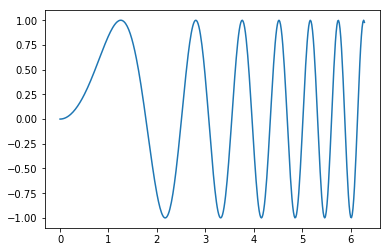

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y)

So `subplots` as the name suggests allows us to create different plots on the same `Figure`. By default, the `subplots` function creates a 1x1 grid and returns one `Axes` object. But the constructor actually takes a couple more interesting arguments.

        matplotlib.pyplot.subplots(
                nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None,
                gridspec_kw=None, **fig_kw)

For starters, you see we can control the rows and columns using `nrows` and `ncols`. 

So let's try that out and let's see if we can create 1 row with 2 columns and do a plot side by side.

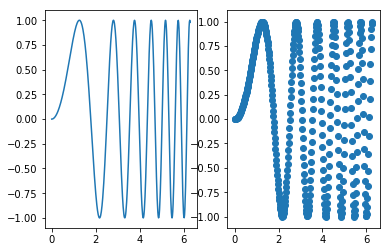

In [17]:
# Let's try 1 row with 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y)
ax2.scatter(x, y)


If we recall from the constructor above, there are `sharex` and `sharey` kwargs. In the figure above, you can see that the numbers on the y-axis are repeated in both diagrams. This doesn't need to be repeated. We can remove that by setting `sharey = True` in the `subplots` call.

`sharey` tells matplotlib that the both plots in the figure have the same y-aixs. Let's see the result of this.

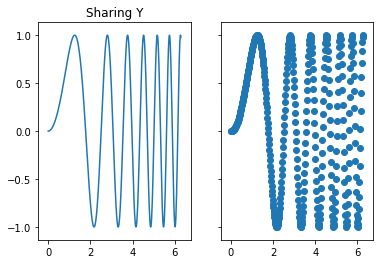

In [20]:
# Let's do it again and set a title as well
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.scatter(x, y)
ax1.set_title('Sharing Y')

But we can do better, we can do more columns. 

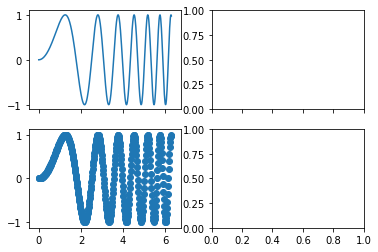

In [30]:
fig, axes = plt.subplots(2, 2, sharex='col')
axes[0, 0].plot(x, y) # Plot row 0, col 0
axes[1, 0].scatter(x, y) # Plot in row 1, col 0

We can even make it bigger by using any of the params that the `Figure` class takes.

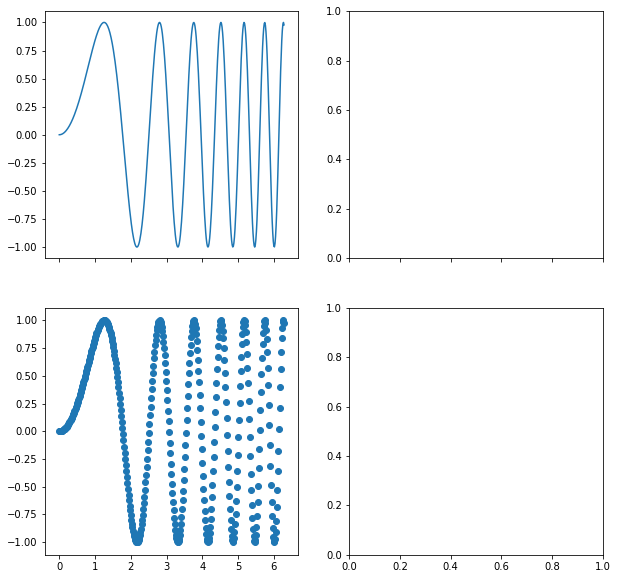

In [29]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(10, 10))
axes[0, 0].plot(x, y) # Plot row 0, col 0
axes[1, 0].scatter(x, y) # Plot in row 1, col 0

So the `subplots` function provides quite a bit of syntatic sugar doesn't it... Let's take a step back to see how we'd compose the steps previously without using the `subplots` shortcut.

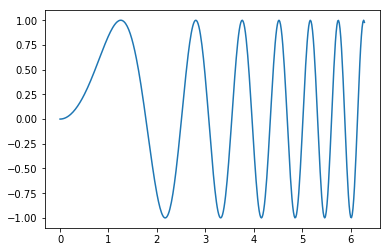

In [43]:
# This is how we'd do one row
fig = plt.figure()
ax = fig.add_subplot(111) # 111 means plot 1, with 1 row and 1 column
ax.plot(x, y)


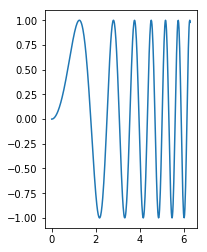

In [49]:
fig = plt.figure()
ax = fig.add_subplot(121) # 111 means plot 1, with 2 rows and 1 column
ax.plot(x, y)


Now let's try the 1x2 combo...

There's a `add_subplot` function that should take an integer or list of integers that give the subplot number on a grid with `row` rows and `col` columns. I couldn't get this to work for me. I found an example that instead uses `GridSpec` which feels a little more intuitive. Look at the constructor:

    class matplotlib.gridspec.GridSpec(nrows, ncols, ...)

It takes a `nrows` and `ncols` so you can easily specify the number of rows and columns you want. Then you can index into the `GridSpec` to tell it which grid you want the spec for.

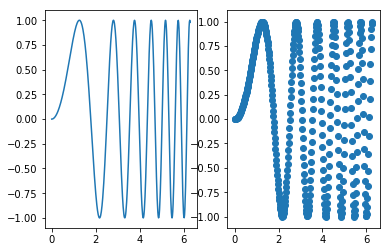

In [95]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
gs = gridspec.GridSpec(1, 2) # 1 row and2 columns
ax1 = fig.add_subplot(gs[0]) # first grid
ax1.plot(x, y)
ax2 = fig.add_subplot(gs[1]) # sceond grid
ax2.scatter(x, y)